In [2]:
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## General Observations

Currently have split up the political groups by economic right vs. left. It seems like the triads 021C, 021D, 111D, 111U might potentially have trends related to this?

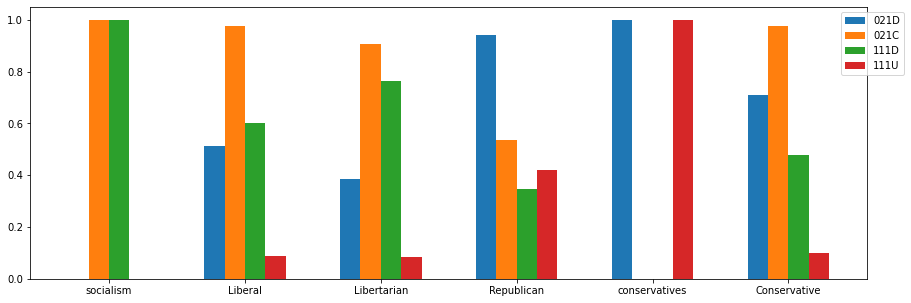

In [26]:
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
df1 = pd.read_csv('results/reddit_networks/reddit_reply_politics.csv',index_col=0)
scaler = MinMaxScaler()

# remove anarchy subreddits and other triads
df1 = df1[3:]
df1 = df1.drop(columns=['003', '012', '102', '021U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300'])

# scale triads
df1 = df1.divide(df1.sum(axis=0), axis=1)
df1 = df1.divide(df1.sum(axis=1), axis=0)

# min-max scaling
columns1 = ['021D', '021C', '111D', '111U']
df1[columns1] = scaler.fit_transform(df1[columns1])

# reorder columns according to economic left vs. right
rows = ['socialism', 'Liberal', 'Libertarian', 'Republican', 'conservatives', 'Conservative']
df1 = df1.reindex(rows)

# plot triadic census
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
width = 0.15
offset = 0
x = np.arange(len(df1.index))
for col in df1:
    ax1.bar(x + offset, df1[col], width, label=col)
    offset += width
ax1.set_xticks([r + width * 1.5 for r in x])
ax1.set_xticklabels(df1.index)
ax1.legend(bbox_to_anchor=(1.05, 1))

plt.show()

## Import Graphs

In [104]:
graphs = dict()
directory = 'results/reddit_networks/graphs'
for file in os.listdir(directory):
    graphs[file.replace('.txt', '')] = nx.read_adjlist(os.path.join(directory, file), create_using=nx.DiGraph())
scaler = MinMaxScaler()

## Triadic Census

Right-wing: Conservative, conservatives, Libertarian, Republican

Left-wing: Liberal, socialism

In [114]:
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
df1 = pd.read_csv('results/reddit_networks/reddit_reply_politics.csv',index_col=0)

# remove anarchy subreddits
df1 = df1[3:]

In [126]:
# scale triads
df1 = df1.divide(df1.sum(axis=0), axis=1)
df1 = df1.divide(df1.sum(axis=1), axis=0)

In [127]:
# min-max scaling
columns1 = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']
df1[columns1] = scaler.fit_transform(df1[columns1])
df1

,003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
Conservative,0.598571,0.839950,0.706454,0.337037,0.818260,0.948475,0.317512,0.167259,0.964506,1.000000,0.094079,0.623895,0.348334,0.590619,0.000000,0.000000
conservatives,0.000000,0.000000,0.000000,1.000000,0.000000,0.488577,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.487634,1.000000
Liberal,0.270161,0.931059,0.965716,0.249148,1.000000,0.737159,0.292211,0.131376,1.000000,0.930658,0.075896,0.418041,0.884422,0.593605,0.064070,0.055167
Libertarian,1.000000,1.000000,1.000000,0.137599,0.667251,0.273956,0.146277,0.074469,0.626648,0.570034,0.062434,0.605950,0.376177,0.543436,0.419229,0.497989
Republican,0.099409,0.387755,0.381079,0.604370,0.540534,1.000000,0.832669,0.420340,0.478143,0.366483,0.296440,0.373535,0.601893,0.354019,0.298899,0.556506
socialism,0.210090,0.438137,0.476961,0.000000,0.463915,0.000000,0.000000,0.000000,0.876411,0.997072,0.000000,1.000000,1.000000,1.000000,1.000000,0.784994


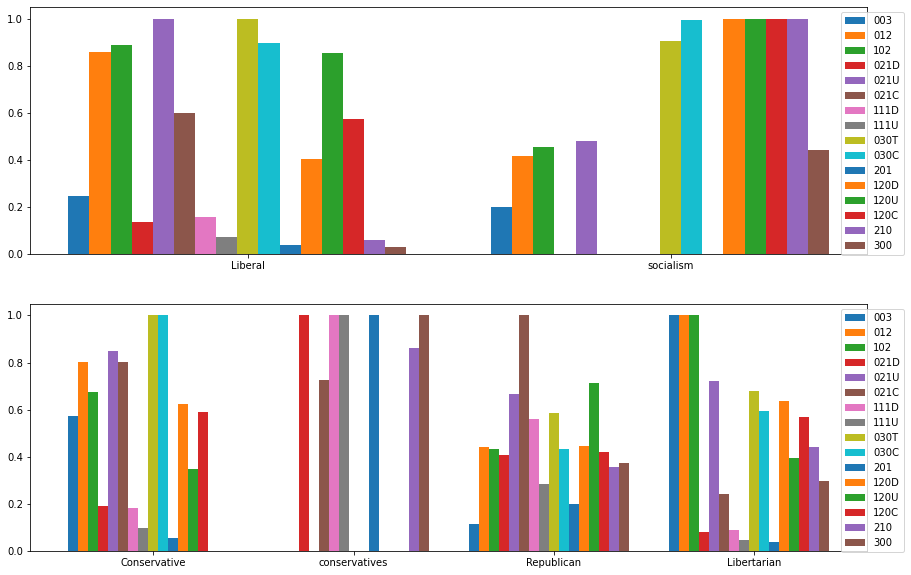

In [162]:
# plot triadic census
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
width = 0.05

# plot left-wing groups
left = df1.loc[['Liberal', 'socialism']]
offset = 0
x = np.arange(len(left.index))
for col in left:
    ax1.bar(x + offset, left[col], width, label=col)
    offset += width
ax1.set_xticks([r + width * 8 for r in x])
ax1.set_xticklabels(left.index)
ax1.legend(bbox_to_anchor=(1.05, 1))

# plot right-wing groups
right = df1.loc[['Conservative', 'conservatives', 'Republican', 'Libertarian']]
offset = 0
x = np.arange(len(right.index))
for col in right:
    ax2.bar(x + offset, right[col], width, label=col)
    offset += width
ax2.set_xticks([r + width * 8 for r in x])
ax2.set_xticklabels(right.index)
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [120]:
# convert to dimensions
df2 = df1.dot(dims)

In [121]:
# min-max scaling
columns2 = ['transitivity', 'equality', 'rationality']
df2[columns2] = scaler.fit_transform(df2[columns2])
df2

,transitivity,equality,rationality
Conservative,0.000000,0.774328,1.000000
conservatives,0.359379,0.111660,0.000000
Liberal,0.116606,1.000000,0.962731
Libertarian,0.390480,0.000000,0.956780
Republican,0.332273,0.514323,0.515615
socialism,1.000000,0.379390,0.465280


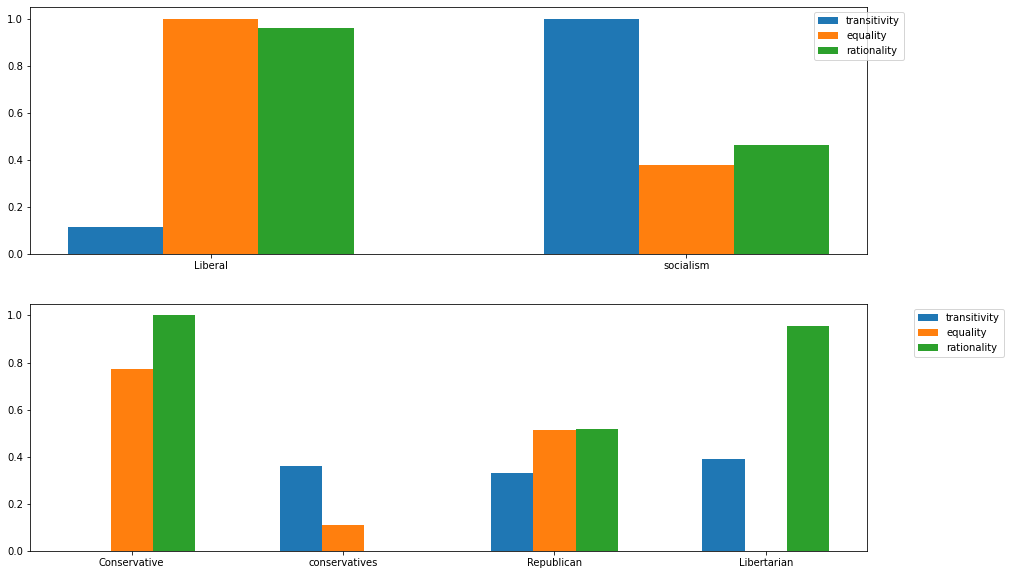

In [190]:
# plot dimensions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
width = 0.2

# plot left-wing groups
left = df2.loc[['Liberal', 'socialism']]
offset = 0
x = np.arange(len(left.index))
for col in left:
    ax1.bar(x + offset, left[col], width, label=col)
    offset += width
ax1.set_xticks([r + width for r in x])
ax1.set_xticklabels(left.index)
ax1.legend(bbox_to_anchor=(1.05, 1))

# plot right-wing groups
right = df2.loc[['Conservative', 'conservatives', 'Republican', 'Libertarian']]
offset = 0
x = np.arange(len(right.index))
for col in right:
    ax2.bar(x + offset, right[col], width, label=col)
    offset += width
ax2.set_xticks([r + width for r in x])
ax2.set_xticklabels(right.index)
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.show()

## PageRank, Reciprocity, Clustering Coefficient

In [208]:
df3 = pd.DataFrame()

for name, graph in graphs.items():
    # pagerank
    pagerank = nx.pagerank(graph)
    # reciprocity
    reciprocity = nx.overall_reciprocity(graph)
    # clustering coefficient
    cluster = nx.average_clustering(graph)
    
    data = {'pagerank_max': max(pagerank.values()), 
            'pagerank_mean': sum(pagerank.values()) / len(pagerank.values()),
            'pagerank_min': min(pagerank.values()),
            'reciprocity': reciprocity,
            'clustering_coefficient': cluster
           }
    series = pd.Series(data, name=name)
    df3 = df3.append(series)
df3

,clustering_coefficient,pagerank_max,pagerank_mean,pagerank_min,reciprocity
Conservative,0.106821,0.018465,0.000108,0.000021,0.506242
conservatives,0.345594,0.121799,0.001325,0.000306,0.645082
Liberal,0.051017,0.017396,0.000439,0.000091,0.546267
Libertarian,0.090649,0.007052,0.000059,0.000011,0.539084
Republican,0.109427,0.038998,0.000597,0.000135,0.551099
socialism,0.120595,0.007492,0.000143,0.000026,0.562013


In [210]:
# min-max scaling
columns3 = ['clustering_coefficient', 'pagerank_max', 'pagerank_mean', 'pagerank_min', 'reciprocity']
df3[columns3] = scaler.fit_transform(df3[columns3])
df3

,clustering_coefficient,pagerank_max,pagerank_mean,pagerank_min,reciprocity
Conservative,0.189438,0.099456,0.039095,0.035137,0.000000
conservatives,1.000000,1.000000,1.000000,1.000000,1.000000
Liberal,0.000000,0.090141,0.300429,0.271740,0.288279
Libertarian,0.134537,0.000000,0.000000,0.000000,0.236547
Republican,0.198282,0.278404,0.425151,0.421413,0.323085
socialism,0.236194,0.003828,0.066478,0.051908,0.401691


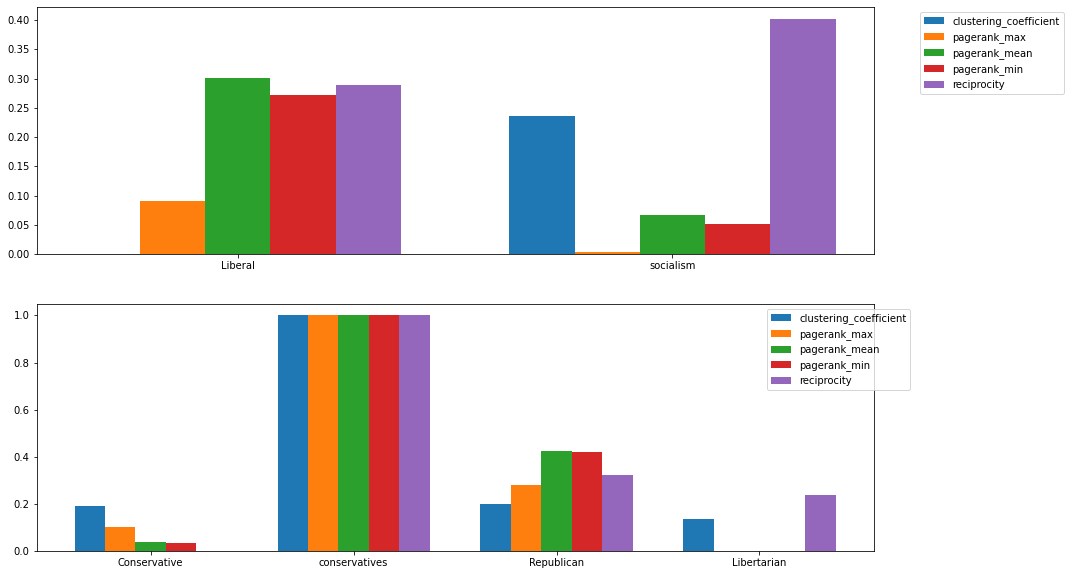

In [211]:
# plot scaled pagerank, reciprocity, clustering coefficient
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
width = 0.15

# plot left-wing groups
left = df3.loc[['Liberal', 'socialism']]
offset = 0
x = np.arange(len(left.index))
for col in left:
    ax1.bar(x + offset, left[col], width, label=col)
    offset += width
ax1.set_xticks([r + width * 2 for r in x])
ax1.set_xticklabels(left.index)
ax1.legend(bbox_to_anchor=(1.05, 1))

# plot right-wing groups
right = df3.loc[['Conservative', 'conservatives', 'Republican', 'Libertarian']]
offset = 0
x = np.arange(len(right.index))
for col in right:
    ax2.bar(x + offset, right[col], width, label=col)
    offset += width
ax2.set_xticks([r + width * 2 for r in x])
ax2.set_xticklabels(right.index)
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.show()

## V-Party Data

Right-wing: Liberal Party of Australia, Republican Party, Conservatives, Conservative Party of Canada (2003), Christian Democratic Union

Left-wing: Australian Labor Party, Democratic Party, Liberal Party, Labour, Liberal Party of Canada, Social Democratic Party of Germany

In [163]:
vp = pd.read_csv('results/reddit_networks/politics_all.csv', index_col=0,)

In [164]:
# min-max scaling
columns_vp = ['illiberalism', 'populism', 'anti-elitism', 'people-centrism', 'political pluralism', 'minority rights', 'rejection of political violence', 'immigration', 'lgbt social equality', 'cultural superiority', 'religious principles', 'gender equality', 'working women', 'economic right', 'welfare', 'clientelism']
vp[columns_vp] = scaler.fit_transform(vp[columns_vp])
vp

,country,illiberalism,populism,anti-elitism,people-centrism,political pluralism,minority rights,rejection of political violence,immigration,lgbt social equality,cultural superiority,religious principles,gender equality,working women,economic right,welfare,clientelism
Liberal Party of Australia,Commonwealth of Australia,0.002632,0.233096,0.273193,0.604302,0.890215,0.820123,0.520325,0.878880,0.319856,0.629684,0.579084,0.671245,0.641546,0.811111,0.231151,0.054499
Australian Labor Party,Commonwealth of Australia,0.002632,0.599644,0.619578,0.706384,0.878282,0.842430,0.550136,1.000000,1.000000,1.000000,0.985883,0.262947,0.929855,0.071944,0.411108,0.418673
Democratic Party,United States of America,0.215789,0.350534,0.406325,0.560259,0.500597,0.316089,1.000000,0.399966,0.938038,0.634550,0.327571,0.585694,0.313430,0.190556,0.490226,0.405577
Republican Party,United States of America,1.000000,0.871886,0.809639,1.000000,0.000000,0.000000,0.000000,0.292848,0.000000,0.063017,0.000000,0.135622,0.000000,1.000000,0.088427,0.392480
Conservatives,United Kingdom of Great Britain and Northern I...,0.147368,0.236655,0.271084,0.662684,0.718377,0.514001,0.616079,0.000000,0.399522,0.000000,0.756554,0.375966,0.491401,0.678056,0.000000,0.356992
Liberal Party,United Kingdom of Great Britain and Northern I...,0.092105,0.462633,0.497590,0.652441,0.705251,1.000000,0.576332,0.906039,0.885167,0.402920,0.991357,0.642346,0.722126,0.460833,0.403971,0.000000
Labour,United Kingdom of Great Britain and Northern I...,0.150000,0.583630,0.579217,0.795152,0.733890,0.512577,0.568202,0.640520,0.758612,0.399270,1.000000,0.500143,0.988599,0.000000,0.868135,0.338403
Conservative Party of Canada (2003),Canada,0.194737,1.000000,1.000000,0.904746,0.890811,0.119601,0.463415,0.688428,0.121770,0.258881,0.503889,0.000000,0.174300,0.821389,0.475334,1.000000
Liberal Party of Canada,Canada,0.052632,0.405694,0.749096,0.171048,0.872315,0.663503,0.498645,0.905027,0.964593,0.538443,0.979833,0.634049,0.557874,0.055556,0.775365,0.688635
Christian Democratic Union,Federal Republic of Germany,0.034211,0.000000,0.000000,0.284056,0.980310,0.415282,0.652213,0.454622,0.208852,0.466180,0.186402,0.462089,0.500870,0.642778,0.512876,0.312210


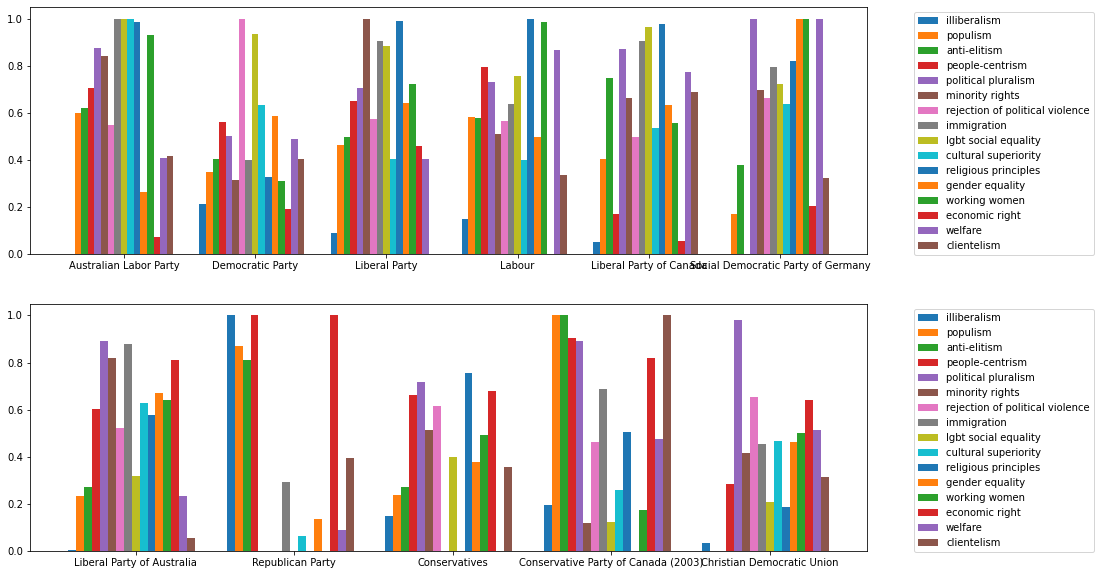

In [179]:
# plot vparty data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
width = 0.05

# plot left-wing groups
left = vp.drop(['country'], axis=1).loc[['Australian Labor Party', 'Democratic Party', 'Liberal Party', 'Labour', 'Liberal Party of Canada', 'Social Democratic Party of Germany']]
offset = 0
x = np.arange(len(left.index))
for col in left:
    ax1.bar(x + offset, left[col], width, label=col)
    offset += width
ax1.set_xticks([r + width * 8 for r in x])
ax1.set_xticklabels(left.index)
ax1.legend(bbox_to_anchor=(1.05, 1))

# plot right-wing groups
right = vp.drop(['country'], axis=1).loc[['Liberal Party of Australia', 'Republican Party', 'Conservatives', 'Conservative Party of Canada (2003)', 'Christian Democratic Union']]
offset = 0
x = np.arange(len(right.index))
for col in right:
    ax2.bar(x + offset, right[col], width, label=col)
    offset += width
ax2.set_xticks([r + width * 8 for r in x])
ax2.set_xticklabels(right.index)
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.show()